Before Start, remember to check the path of dataset and location of utils.py

In [ ]:
import importlib
import utils
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, auc
import phate

import warnings
warnings.filterwarnings("ignore")



from utils import Gaussian_Mixture_Representation
from utils import Extract_Info
from utils import calculate_qot
from utils import visualize_and_evaluate
from utils import normalize_matrix
from utils import perform_analysis_phate_and_calculate_aucpr

Reading Annotated data

In [5]:
file_path = 'QOT/Dataset/myocardial_infarction.h5ad'
adata=sc.read_h5ad(file_path)

Extract Dataframe from Annotated Data

In [6]:
Extract_Info(adata,  gene_matrix= 'PCA', type_cell = 'cell_subtype',id= 'sampleID', progession='Status',dataset_type='rna')

Obtain the Gaussian Mixture Representation of the Gene Matrix

In [34]:
Gaussian_Mixture_Representation(adata, num_components=4, random_state=2)

Generate the sample level distance matrix by QOT method

In [35]:
calculate_qot(adata, method = "exact",normalized = True)
print("QOT Complete")

Calculating GW2 distance 1/190: control_P1 to RZ_FZ_P5
Calculating GW2 distance 2/190: control_P1 to RZ_BZ_P3
Calculating GW2 distance 3/190: control_P1 to RZ_BZ_P2
Calculating GW2 distance 4/190: control_P1 to RZ_P3
Calculating GW2 distance 5/190: control_P1 to RZ_P6
Calculating GW2 distance 6/190: control_P1 to control_P7
Calculating GW2 distance 7/190: control_P1 to control_P8
Calculating GW2 distance 8/190: control_P1 to RZ_GT_P2
Calculating GW2 distance 9/190: control_P1 to RZ_P9
Calculating GW2 distance 10/190: control_P1 to IZ_P10
Calculating GW2 distance 11/190: control_P1 to RZ_P11
Calculating GW2 distance 12/190: control_P1 to GT_IZ_P9
Calculating GW2 distance 13/190: control_P1 to RZ_BZ_P12
Calculating GW2 distance 14/190: control_P1 to GT_IZ_P13
Calculating GW2 distance 15/190: control_P1 to IZ_P16
Calculating GW2 distance 16/190: control_P1 to GT_IZ_P15
Calculating GW2 distance 17/190: control_P1 to GT_IZ_P9_rep2
Calculating GW2 distance 18/190: control_P1 to IZ_P15
Calcul

Evaluation of the Distance Matrix Based on Silhoutte Score; Silhoutte Score (PILOT version); ARI (Adjusted Rand Index)

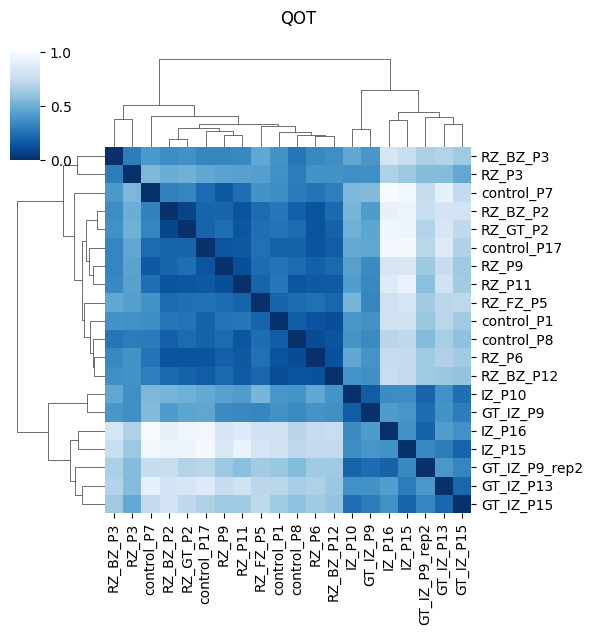

Silhouette Score: 0.5566759804413889
Silhouette Score (PILOT Version): 0.8475572806855706


In [36]:
visualize_and_evaluate(adata)

Downstream Analysis: Trajectory Estimation using PHATE

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 20 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 5
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.02 seconds.


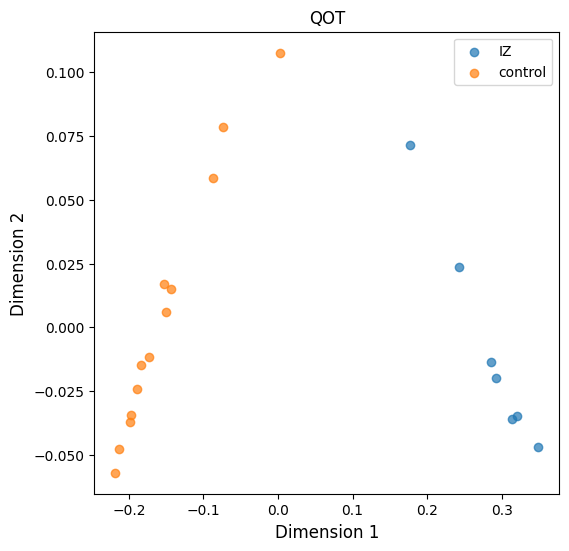

AUCPR: 1.0


In [43]:
perform_analysis_phate_and_calculate_aucpr(adata,dataset_name = 'MYIO')